## Análisis Exploratorio de los Ingresos recaudados de la Municipalidad Distrital de Pucusana - Año 2022
La información corresponde a todos los ingresos recaudados por la Municipalidad Distrital de Pucusana en el año 2022 (Enero - Setiembre). Los tipos de ingresos corresponden a impuesto predial, arbitrios (limpieza pública, parques y jardines o serenazgo) y otros conceptos como: formularios, carnets, constancias, multas, etc.

## 1. Carga de Datos de Diferentes Origenes

La data con la cual se trabaja en este caso de estudio es obtenida de la [Plataforma de Datos Abiertos - Municipalidad Distrital de Pucusana en el año 2022](https://www.datosabiertos.gob.pe/dataset/ingresos-recaudados-de-la-municipalidad-distrital-de-pucusana/resource/393d94a0-0350-4901).
* En esta sección se procede a realizar la carga de datos del Google Drive
* Se eliminan los espacios en blanco de los cabeceras de columna.
* Los valores numericos que fueron leidos como obect, son convertidos a su tipo de dato regular.



In [132]:
import pandas as pd

url='https://drive.google.com/file/d/1P7gB1y4SbMEeeQwOA-eX_AYiI-4tc9oR/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url, encoding = 'utf-8', sep=';')

df.shape

(101859, 38)

In [133]:
df.columns

Index(['FECHA_CORTE', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'ANIO', 'NUMMOVIMIENTO', 'TIPOMOV', 'CODPERSONA', 'docidentidad',
       'DATOSPERSONA', 'OBSERVACIONES', ' IMPORTE_C ', ' DERECHO_C ',
       ' INTERESES_C ', ' REAJUSTE_C ', ' DESCUENTO_C ', ' TOTALCOBRADO ',
       ' RECIBIDO ', ' VUELTO ', 'FECHACANC', 'FECHACANC.1', 'TIPOPAGO',
       'NUMORDEN', 'ANIORECIBO', 'NUMRECIBO', 'CODCUENTA', 'CODTRIBUTO',
       'NUMCUOTA', 'CODPREDIO', 'UBICACIONPREDIAL', 'CONCEPTO', ' IMPORTE_D ',
       ' DERECHO_D ', ' INTERESES_D ', ' REAJUSTE_D ', ' DESCUENTO_D ',
       ' SUBTOTAL_D '],
      dtype='object')

In [134]:
# Eliminando los caracteres en blanco del nombre de las columnas
df.rename(columns = {' IMPORTE_C ':'IMPORTE_C', 
                     ' DERECHO_C ':'DERECHO_C',
                     ' INTERESES_C ':'INTERESES_C',
                     ' REAJUSTE_C ':'REAJUSTE_C',
                     ' DESCUENTO_C ':'DESCUENTO_C',
                     ' TOTALCOBRADO ':'TOTALCOBRADO',
                     ' RECIBIDO ':'RECIBIDO',
                     ' VUELTO ':'VUELTO',
                     ' DERECHO_D ':'DERECHO_D',
                     ' INTERESES_D ':'INTERESES_D',
                     ' REAJUSTE_D ':'REAJUSTE_D',
                     ' IMPORTE_D ':'IMPORTE_D',
                     ' DESCUENTO_D ':'DESCUENTO_D',
                     ' SUBTOTAL_D ':'SUBTOTAL_D'}, inplace=True)

Convirtiendo a tipos de dato numericos, aquellos datos que fueron interpretados como OBJECT por el Pandas, principalmente por error de interpretación de la coma de millar.

In [135]:
# String to Float format
def StringToFloatFormat(x):
  partialNum = x.split(',')
  allNum = ''
  
  for num in partialNum:
    allNum = allNum + num

  return allNum

#print(StringToFloatFormat('19,571.37'))
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].apply(StringToFloatFormat)

In [136]:
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['UBIGEO'] = df['UBIGEO'].astype(str)
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101859 entries, 0 to 101858
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FECHA_CORTE       101859 non-null  object 
 1   UBIGEO            101859 non-null  object 
 2   DEPARTAMENTO      101859 non-null  object 
 3   PROVINCIA         101859 non-null  object 
 4   DISTRITO          101859 non-null  object 
 5   ANIO              101859 non-null  int64  
 6   NUMMOVIMIENTO     101859 non-null  int64  
 7   TIPOMOV           101859 non-null  object 
 8   CODPERSONA        101859 non-null  int64  
 9   docidentidad      101859 non-null  object 
 10  DATOSPERSONA      101859 non-null  object 
 11  OBSERVACIONES     98061 non-null   object 
 12  IMPORTE_C         101859 non-null  object 
 13  DERECHO_C         101859 non-null  object 
 14  INTERESES_C       101859 non-null  object 
 15  REAJUSTE_C        101859 non-null  object 
 16  DESCUENTO_C       10

In [137]:
#dataContepto = df.groupby(['CONCEPTO'])['CONCEPTO'].count()

#dfAlcabala = df.query("((CONCEPTO == 'ALCABALA'))")
#dfAlcabala['TOTALCOBRADO']
#dfAlcabala['TOTALCOBRADO'].sum()

## 2. Análisis Exploratorio de Datos
Se procederá con el análisis de las recaudaciones, canales habituales, TOP de conceptos u otros que nos permita entender mejor la data con la que contamos.

In [138]:
col_interes = ['CODPERSONA', 'TOTALCOBRADO', 'RECIBIDO', 'FECHACANC', 'FECHACANC.1', 'TIPOPAGO', 'CODTRIBUTO', 'CONCEPTO']
df[col_interes].head()

,CODPERSONA,TOTALCOBRADO,RECIBIDO,FECHACANC,FECHACANC.1,TIPOPAGO,CODTRIBUTO,CONCEPTO
0,4066,146.05,146.05,3/01/2022,lunes0103,BCP,1.0,IMPUESTO PREDIAL
1,4066,44.36,44.36,3/01/2022,lunes0103,BCP,1.0,LIMPIEZA PÚBLICA
2,4066,44.36,44.36,3/01/2022,lunes0103,BCP,3.0,PARQUES Y JARDINES
3,4066,44.36,44.36,3/01/2022,lunes0103,BCP,4.0,SERENAZGO
4,10321,518.28,600.00,4/01/2022,martes0104,EFECTIVO,1.0,IMPUESTO PREDIAL


### 2.1 Identificando los canales de pago
Notamos que del total de canales habilitados, el **BCP** es ampliamente usado por la mayoria de contribuyentes. 

In [139]:
from tables import index

dataTipoPago = df.groupby(['TIPOPAGO']).agg({'TIPOPAGO':'count', 'TOTALCOBRADO':['sum', 'max']})
dataTipoPago = dataTipoPago.reset_index()

headers = ['TipoPago', 'Count', 'Sum', 'Max']
dataTipoPago.columns = headers

dataTipoPagoSortBySum = dataTipoPago.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataTipoPagoSortBySum

,TipoPago,Count,Sum,Max
0,BCP,32970,2.873328e+08,437071.76
1,EFECTIVO,45280,3.467979e+07,73015.13
2,VISA,21981,2.999377e+07,28165.71
3,OPENPAY,1065,3.166908e+06,8725.87
4,CHEQUE,563,3.010220e+06,24521.00


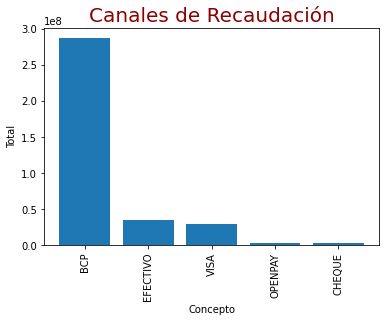

In [140]:
import matplotlib.pyplot as plt

x = dataTipoPagoSortBySum.TipoPago.tolist()
y = dataTipoPagoSortBySum.Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Canales de Recaudación', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

### 2.2 Conceptos de Mayor Recaudación
Se identifica los **TOP 05** de conceptos de mayor recaudación de la Municipalidad Distrital de Pucusana en el 2022, para ello debemos analizar los pagos **Outlier** del promedio, conceptos con los cuales trabajaremos.

In [141]:
dataContepto = df.groupby(['CONCEPTO']).agg({'CONCEPTO':'count',
                                             'TOTALCOBRADO':['sum', 'max']})
dataContepto = dataContepto.reset_index()
dataContepto.head()

CONCEPTO       TOTALCOBRADO           
                                    count          sum        max
0                          ALCABALA     8    362380.38  155461.52
1                 BAÑOS MUNICIPALES   398     48323.85    1351.00
2                           CARNETS    14       263.20      18.80
3  CARNETS Y/O TARJETAS DE ATENCION   231      4334.00      18.80
4        CERTIFICADOS DOMICILIARIOS     1         8.80       8.80

In [142]:
dataContepto.shape

(53, 4)

In [143]:
dataContepto.columns

MultiIndex([(    'CONCEPTO',      ''),
            (    'CONCEPTO', 'count'),
            ('TOTALCOBRADO',   'sum'),
            ('TOTALCOBRADO',   'max')],
           )

In [144]:
from tables import index
headers = ['Concepto', 'Count', 'Sum', 'Max']
dataContepto.columns = headers

dataConteptoSortBySum = dataContepto.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataConteptoSortBySum.head()

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


In [145]:
dataConteptoSortBySum['Sum'].shape

(53,)

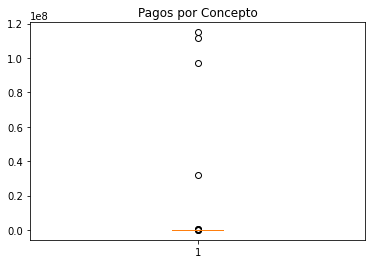

In [146]:
import matplotlib.pyplot as plt

plt.boxplot(dataConteptoSortBySum['Sum'].tolist())
plt.title('Pagos por Concepto')
plt.show()

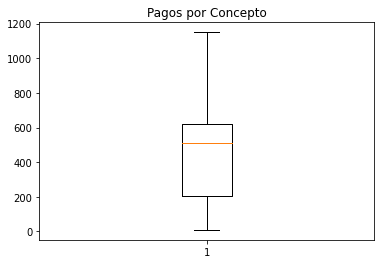

In [147]:
import matplotlib.pyplot as plt

plt.boxplot(dataConteptoSortBySum['Sum'].tail(20).tolist())
plt.title('Pagos por Concepto')
plt.show()

### TOP 05 - Evaluando los conceptos con mayor recaudación
Observamos que los mayores ingresos municipales son por los conceptos de
1. Limpieza Publica
2. Serenazgo
3. Parques y Jardines
4. Impuesto Predial



In [148]:
rango = dataConteptoSortBySum.index<5
rango

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [149]:
dataConteptoSortBySum[rango]

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


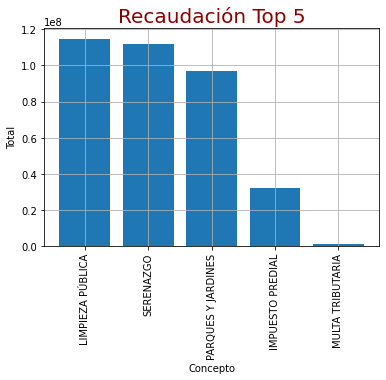

In [150]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 5', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.bar(dataConteptoSortBySum[rango].Concepto.tolist(), dataConteptoSortBySum[rango].Sum.tolist())

plt.grid(True)
plt.show()

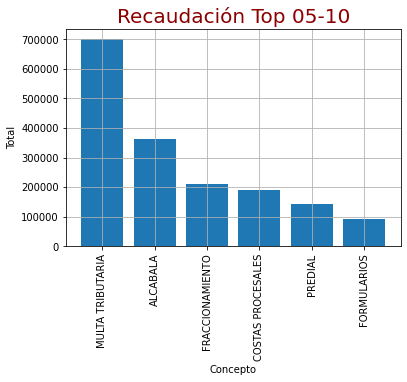

In [151]:
plt.title('Recaudación Top 05-10', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)
rango = (dataConteptoSortBySum.index>=4)&(dataConteptoSortBySum.index<10)
plt.bar(dataConteptoSortBySum[rango].Concepto.tolist(), dataConteptoSortBySum[rango].Sum.tolist())

plt.grid(True)
plt.show()

### 2.3 Monto Recaudado en el Tiempo
Evaluando los montos totales recaudados en una línea temporal, para identificar que el mes de **MAYO** es el mes en el que ampliamente se recauda mayores dinero respecto a todos los demas meses del año.

In [152]:
# Filtrando los CONCEPTOS Top 5 en recaudación
condicion = "(CONCEPTO == 'LIMPIEZA PÚBLICA') | (CONCEPTO == 'SERENAZGO') | (CONCEPTO == 'PARQUES Y JARDINES') | (CONCEPTO == 'IMPUESTO PREDIAL') | (CONCEPTO == 'MULTA TRIBUTARIA')"
dataTop5Concepto = df.query(condicion)

# Truncando los dias de las fechas - Agrupando por meses los valores
dataMYTop5Concepto = dataTop5Concepto.copy(deep=True)
dataMYTop5Concepto['FechaMY'] = dataMYTop5Concepto['FECHACANC'].apply(lambda x:x[len(x)-7:])
#dataMYTop5Concepto.head()

# Obteniendo los valores de las TOP 5 categorias en columnas independientes para el uso del GROUPBY
dataMYTop5Concepto['LIMPIEZA'] = dataMYTop5Concepto[['CONCEPTO', 'TOTALCOBRADO']].apply(lambda x: x.TOTALCOBRADO if(x.CONCEPTO == 'LIMPIEZA PÚBLICA') else 0, axis=1)
dataMYTop5Concepto['SERENAZGO'] = dataMYTop5Concepto[['CONCEPTO', 'TOTALCOBRADO']].apply(lambda x: x.TOTALCOBRADO if(x.CONCEPTO == 'SERENAZGO') else 0, axis=1)
dataMYTop5Concepto['PARQUES'] = dataMYTop5Concepto[['CONCEPTO', 'TOTALCOBRADO']].apply(lambda x: x.TOTALCOBRADO if(x.CONCEPTO == 'PARQUES Y JARDINES') else 0, axis=1)
dataMYTop5Concepto['PREDIAL'] = dataMYTop5Concepto[['CONCEPTO', 'TOTALCOBRADO']].apply(lambda x: x.TOTALCOBRADO if(x.CONCEPTO == 'IMPUESTO PREDIAL') else 0, axis=1)
dataMYTop5Concepto['MULTAS'] = dataMYTop5Concepto[['CONCEPTO', 'TOTALCOBRADO']].apply(lambda x: x.TOTALCOBRADO if(x.CONCEPTO == 'MULTA TRIBUTARIA') else 0, axis=1)

dataMYTop5Concepto[['FECHACANC', 'FechaMY', 'CONCEPTO', 'TOTALCOBRADO', 'LIMPIEZA', 'SERENAZGO', 'PARQUES', 'PREDIAL', 'MULTAS']]

,FECHACANC,FechaMY,CONCEPTO,TOTALCOBRADO,LIMPIEZA,SERENAZGO,PARQUES,PREDIAL,MULTAS
0,3/01/2022,01/2022,IMPUESTO PREDIAL,146.05,0.00,0.00,0.00,146.05,0.0
1,3/01/2022,01/2022,LIMPIEZA PÚBLICA,44.36,44.36,0.00,0.00,0.00,0.0
2,3/01/2022,01/2022,PARQUES Y JARDINES,44.36,0.00,0.00,44.36,0.00,0.0
3,3/01/2022,01/2022,SERENAZGO,44.36,0.00,44.36,0.00,0.00,0.0
4,4/01/2022,01/2022,IMPUESTO PREDIAL,518.28,0.00,0.00,0.00,518.28,0.0
...,...,...,...,...,...,...,...,...,...
101854,30/09/2022,09/2022,PARQUES Y JARDINES,49.79,0.00,0.00,49.79,0.00,0.0
101855,30/09/2022,09/2022,SERENAZGO,49.79,0.00,49.79,0.00,0.00,0.0
101856,30/09/2022,09/2022,LIMPIEZA PÚBLICA,49.79,49.79,0.00,0.00,0.00,0.0
101857,30/09/2022,09/2022,PARQUES Y JARDINES,49.79,0.00,0.00,49.79,0.00,0.0


In [153]:
dataMYTop5ConceptoTiempo = dataMYTop5Concepto.groupby(['FechaMY']).agg({'LIMPIEZA':'sum', 'SERENAZGO':'sum', 'PARQUES':'sum', 'PREDIAL':'sum', 'MULTAS':'sum'})
dataMYTop5ConceptoTiempo = dataMYTop5ConceptoTiempo.reset_index()
dataMYTop5ConceptoTiempo.head()

,FechaMY,LIMPIEZA,SERENAZGO,PARQUES,PREDIAL,MULTAS
0,01/2022,2629884.05,2513244.33,1889840.94,1651237.20,8535.44
1,02/2022,5177885.35,4009953.35,4554726.02,6426183.91,16109.64
2,03/2022,9820046.52,9629865.50,4430242.29,4832570.08,6872.52
3,04/2022,2245960.31,2132560.23,2094577.33,1801033.94,17244.49
4,05/2022,79950055.14,79071860.66,70781896.80,3057936.04,33187.30


In [154]:
import plotly.express as px

fig = px.line(dataMYTop5ConceptoTiempo, x='FechaMY', y=dataMYTop5ConceptoTiempo.columns, 
              hover_data={'FechaMY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Linea de Tiempo de Pago de los Conceptos Top 05')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()

### 2.4 Cantidad de Operaciones Realizadas en el Tiempo
En un análisis de la cantidad de operaciones realizadas en el año, se evidencia que esta se encuentra distribuida entre los meses de febrero, marzo y mayo.
Con un incremento de la cantidad de operaciones hacia los últimos meses del año.
Este difiere un poco respecto a la cantidad de dinero recaudado en el año.

In [155]:
dataMYConcepto = pd.crosstab(dataMYTop5Concepto.FechaMY, dataMYTop5Concepto.CONCEPTO)
dataMYConcepto = dataMYConcepto.reset_index()
#dataMYConcepto

In [156]:
import plotly.express as px

fig = px.line(dataMYConcepto, x='FechaMY', y=dataMYConcepto.columns, 
              hover_data={'FechaMY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='MUNICIPALIDAD DISTRITAL DE PUCUSANA: Frecuencia de Pago - TOP 05 - Conceptos')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show() 

### 2.4 Cantidad de Operaciones Vs Cantidad Recaudada (S/.)

In [157]:
dataMY = df.copy(deep=True)
dataMY['FechaMY'] = dataMY['FECHACANC'].apply(lambda x:x[len(x)-7:])

dataMYTiempo = dataMY.groupby(['FechaMY']).agg({'FechaMY':'count', 'TOTALCOBRADO':['sum']})
dataMYTiempo = dataMYTiempo.reset_index()

headers = ['FechaMY', 'Count', 'Sum']
dataMYTiempo.columns = headers
#dataMYTiempo.head()

In [158]:
import plotly.express as px

fig = px.line(dataMYTiempo, x='FechaMY', y=dataMYTiempo.columns, 
              hover_data={'FechaMY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='Pagos x Monto y Cantidad de Operaciones')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()

### 2.5 Evaluando los canales de pago del Top 5 de Recaudación 

In [159]:
condicion = "(CONCEPTO == 'LIMPIEZA PÚBLICA') | (CONCEPTO == 'SERENAZGO') | (CONCEPTO == 'PARQUES Y JARDINES') | (CONCEPTO == 'IMPUESTO PREDIAL') | (CONCEPTO == 'MULTA TRIBUTARIA')"
dataTop5Concepto = df.query(condicion)
dataTop5Concepto[col_interes].head()

,CODPERSONA,TOTALCOBRADO,RECIBIDO,FECHACANC,FECHACANC.1,TIPOPAGO,CODTRIBUTO,CONCEPTO
0,4066,146.05,146.05,3/01/2022,lunes0103,BCP,1.0,IMPUESTO PREDIAL
1,4066,44.36,44.36,3/01/2022,lunes0103,BCP,1.0,LIMPIEZA PÚBLICA
2,4066,44.36,44.36,3/01/2022,lunes0103,BCP,3.0,PARQUES Y JARDINES
3,4066,44.36,44.36,3/01/2022,lunes0103,BCP,4.0,SERENAZGO
4,10321,518.28,600.00,4/01/2022,martes0104,EFECTIVO,1.0,IMPUESTO PREDIAL


In [160]:
from tables import index

dataTipoPagoTop5 = dataTop5Concepto.groupby(['TIPOPAGO']).agg({'TIPOPAGO':'count', 'TOTALCOBRADO':['sum', 'max']})
dataTipoPagoTop5 = dataTipoPagoTop5.reset_index()

headers = ['TipoPago', 'Count', 'Sum', 'Max']
dataTipoPagoTop5.columns = headers

dataTipoPagoTop5SortBySum = dataTipoPagoTop5.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataTipoPagoTop5SortBySum

,TipoPago,Count,Sum,Max
0,BCP,32769,2.867373e+08,437071.76
1,EFECTIVO,40551,3.395168e+07,30044.15
2,VISA,21249,2.973500e+07,28165.71
3,OPENPAY,1064,3.158182e+06,8725.87
4,CHEQUE,552,2.933039e+06,24521.00


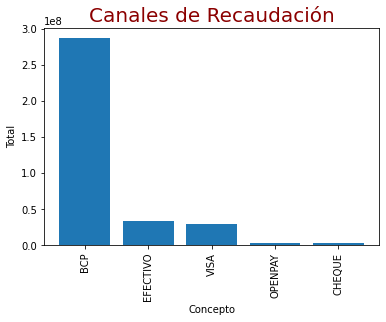

In [161]:
import matplotlib.pyplot as plt

x = dataTipoPagoTop5SortBySum.TipoPago.tolist()
y = dataTipoPagoTop5SortBySum.Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Canales de Recaudación', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

## 3. Evaluación en **DECILES** de los Conceptos Recaudado
Se evidencia que el 1er Decil angloba los pagos con un margen ampliamente superior respecto a los demas conceptos, por lo que se debe poner especial cuidado en la recaudación de dichos conceptos.

In [162]:
# Creando los deciles
groupDeciles = 5
countDeciles = 0
sumItem = 0
contRango = 1

dataConceptoDecil = []
dataConceptoValor = []

for valItem in dataConteptoSortBySum['Sum'].tolist(): 
  if countDeciles < groupDeciles:
    countDeciles = countDeciles+1
    sumItem = sumItem + valItem
  else:
    dataConceptoDecil.append('Decil ' + str(contRango))
    dataConceptoValor.append(sumItem)
    sumItem = valItem
    contRango = contRango + 1
    countDeciles = 1

dataConceptoValor[9] = dataConceptoValor[9] + sumItem

In [163]:
dataConceptoDFDecil = pd.DataFrame(dataConceptoValor, dataConceptoDecil).reset_index()
headers = ['Decil', 'Valor']
dataConceptoDFDecil.columns = headers

dataConceptoDFDecil

,Decil,Valor
0,Decil 1,3.565153e+08
1,Decil 2,9.988709e+05
2,Decil 3,3.370452e+05
3,Decil 4,1.936984e+05
4,Decil 5,8.821640e+04
5,Decil 6,3.143103e+04
6,Decil 7,1.166260e+04
7,Decil 8,3.779800e+03
8,Decil 9,2.417600e+03
9,Decil 10,1.109600e+03


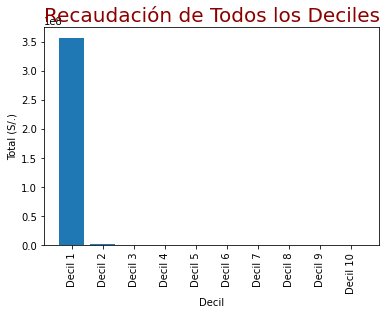

In [164]:
import matplotlib.pyplot as plt

x = dataConceptoDFDecil.Decil.tolist()
y = dataConceptoDFDecil.Valor.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación de Todos los Deciles', fontdict=font)
plt.xlabel('Decil')
plt.ylabel('Total (S/.)')

# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.bar(x, y)
plt.show()

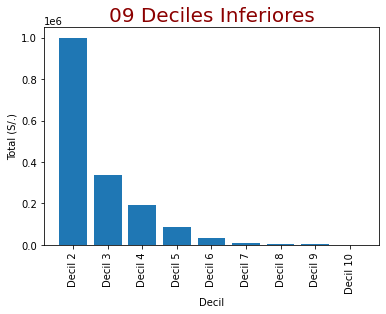

In [165]:
import matplotlib.pyplot as plt

x = dataConceptoDFDecil.Decil.tail(9).tolist()
y = dataConceptoDFDecil.Valor.tail(9).tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('09 Deciles Inferiores', fontdict=font)
plt.xlabel('Decil')
plt.ylabel('Total (S/.)')

# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.bar(x, y)
plt.show()